<a href="https://colab.research.google.com/github/egipot/Python_simple_projects/blob/main/Stocks_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM
Long Short Term memory is an algorithm used in deep learning for time series data.
https://en.wikipedia.org/wiki/Long_short-term_memory

And one good data to analyze is a stock price prediction.

In this Deep learning case study, we will use Taiwan Semiconductor Manufacturing (TSM)'s data.

**Documentation:**  (for the first part)
*   https://numpy.org/doc/stable/
*   https://pandas.pydata.org/docs/
*   https://matplotlib.org/stable/index.html

Source of Data:
https://www.nasdaq.com/market-activity/stocks

In [7]:
# Import the necessary modules

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

1. Import and know your data.

In [8]:
# Read csv file
# - make sure that it is uploaded in the specified path
# - if no path is specified, the csv file must in the same folder as this py/ipynb code

# Store the csv content as DataFrame (df)
df = pd.read_csv('HistoricalData_1722675421357.csv')

In [9]:
# Print the first 10 rows

df.head(10)


,Date,Close/Last,Volume,Open,High,Low
0,08/02/2024,$149.86,31095270,$151.25,$153.86,$146.89
1,08/01/2024,$158.18,21095640,$163.48,$167.665,$156.84
2,07/31/2024,$165.80,19860380,$163.77,$166.65,$162.07
3,07/30/2024,$154.54,22017960,$160.44,$161.1499,$152.55
4,07/29/2024,$160.01,12663080,$162.68,$163.23,$158.63
5,07/26/2024,$161.94,13089170,$164.30,$164.59,$159.19
6,07/25/2024,$160.28,25731750,$158.16,$163.40,$152.11
7,07/24/2024,$159.80,19536580,$165.09,$165.45,$159.59
8,07/23/2024,$169.82,11690670,$169.42,$171.54,$167.9666
9,07/22/2024,$169.35,21037200,$166.61,$170.88,$166.18


In [10]:
# Print the last 10 rows

df.tail(10)

,Date,Close/Last,Volume,Open,High,Low
2507,08/15/2014,$20.45,7212447,$20.55,$20.55,$20.30
2508,08/14/2014,$20.53,6287022,$20.55,$20.60,$20.46
2509,08/13/2014,$20.33,11932500,$20.33,$20.45,$20.27
2510,08/12/2014,$19.99,9283795,$20.10,$20.11,$19.90
2511,08/11/2014,$20.05,10038400,$20.01,$20.17,$20.01
2512,08/08/2014,$19.79,19783120,$19.97,$20.03,$19.72
2513,08/07/2014,$19.91,8653520,$20.10,$20.24,$19.87
2514,08/06/2014,$20.04,9394003,$19.96,$20.11,$19.89
2515,08/05/2014,$19.80,13411880,$20.01,$20.05,$19.68
2516,08/04/2014,$20.51,9836283,$20.56,$20.62,$20.35


In [11]:
# Rename "Close/Last" column to "Close" in order to simplify the df

df.rename(columns={'Close/Last':'Close'}, inplace=True)

In [12]:
# Check the result by showing a sample of the new table

df.head(10)

,Date,Close,Volume,Open,High,Low
0,08/02/2024,$149.86,31095270,$151.25,$153.86,$146.89
1,08/01/2024,$158.18,21095640,$163.48,$167.665,$156.84
2,07/31/2024,$165.80,19860380,$163.77,$166.65,$162.07
3,07/30/2024,$154.54,22017960,$160.44,$161.1499,$152.55
4,07/29/2024,$160.01,12663080,$162.68,$163.23,$158.63
5,07/26/2024,$161.94,13089170,$164.30,$164.59,$159.19
6,07/25/2024,$160.28,25731750,$158.16,$163.40,$152.11
7,07/24/2024,$159.80,19536580,$165.09,$165.45,$159.59
8,07/23/2024,$169.82,11690670,$169.42,$171.54,$167.9666
9,07/22/2024,$169.35,21037200,$166.61,$170.88,$166.18


In [13]:
# Get information about the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2517 non-null   object
 1   Close   2517 non-null   object
 2   Volume  2517 non-null   int64 
 3   Open    2517 non-null   object
 4   High    2517 non-null   object
 5   Low     2517 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


In [14]:
# Describe the dataframe

df.describe()

,Volume
count,2.517000e+03
mean,9.712826e+06
std,5.396610e+06
min,1.499721e+06
25%,6.287022e+06
50%,8.459045e+06
75%,1.157814e+07
max,6.079317e+07


^Notice that only Volume volumn is described because the other columns are still non-numerical type.

In [15]:
# Remove dollar signs in specific columns and convert to numeric data type (float)
cols = ['Close', 'Open', 'High', 'Low']

for col in cols:
  df[col] = df[col].str.replace('$', '').astype(float)

You may also check specific data (by verifying the type and/or referencing via index)

In [16]:
type(df.Close[10])

numpy.float64

In [17]:
df['Close'][2]

165.8

In [18]:
# Check again the data to see the results:

df.head(10)

,Date,Close,Volume,Open,High,Low
0,08/02/2024,149.86,31095270,151.25,153.8600,146.8900
1,08/01/2024,158.18,21095640,163.48,167.6650,156.8400
2,07/31/2024,165.80,19860380,163.77,166.6500,162.0700
3,07/30/2024,154.54,22017960,160.44,161.1499,152.5500
4,07/29/2024,160.01,12663080,162.68,163.2300,158.6300
5,07/26/2024,161.94,13089170,164.30,164.5900,159.1900
6,07/25/2024,160.28,25731750,158.16,163.4000,152.1100
7,07/24/2024,159.80,19536580,165.09,165.4500,159.5900
8,07/23/2024,169.82,11690670,169.42,171.5400,167.9666
9,07/22/2024,169.35,21037200,166.61,170.8800,166.1800


In [19]:
# Describe again and see how other columns are also summarized

df.describe()

,Close,Volume,Open,High,Low
count,2517.000000,2.517000e+03,2517.000000,2517.000000,2517.000000
mean,63.533727,9.712826e+06,63.574519,64.254148,62.838483
std,38.815970,5.396610e+06,38.917519,39.434777,38.287923
min,18.760000,1.499721e+06,17.740000,19.430000,17.320000
25%,31.100000,6.287022e+06,31.040000,31.260000,30.800000
50%,44.510000,8.459045e+06,44.340000,44.845000,44.000000
75%,93.220000,1.157814e+07,93.340000,94.320000,92.240000
max,191.050000,6.079317e+07,193.090000,193.470000,186.700000




---



2. Visualize the data

In [20]:
# The current data shows the latest/newest date (~2024), down to the oldest (~2014)
# 1. Convert the column Date into datetime
# 2. Sort the Date values to ascending


df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)

In [21]:
# Check the result, just to check that the data is prepared and sorted (as commanded above) before plotting:

df.head(5)

,Date,Close,Volume,Open,High,Low
2516,2014-08-04,20.51,9836283,20.56,20.62,20.35
2515,2014-08-05,19.80,13411880,20.01,20.05,19.68
2514,2014-08-06,20.04,9394003,19.96,20.11,19.89
2513,2014-08-07,19.91,8653520,20.10,20.24,19.87
2512,2014-08-08,19.79,19783120,19.97,20.03,19.72


In [22]:
# Set the date as the dataframe index

df = df.set_index('Date')

In [23]:
# Verify that the index has been updated

df.head(5)

,Close,Volume,Open,High,Low
Date,,,,,
2014-08-04,20.51,9836283,20.56,20.62,20.35
2014-08-05,19.80,13411880,20.01,20.05,19.68
2014-08-06,20.04,9394003,19.96,20.11,19.89
2014-08-07,19.91,8653520,20.10,20.24,19.87
2014-08-08,19.79,19783120,19.97,20.03,19.72


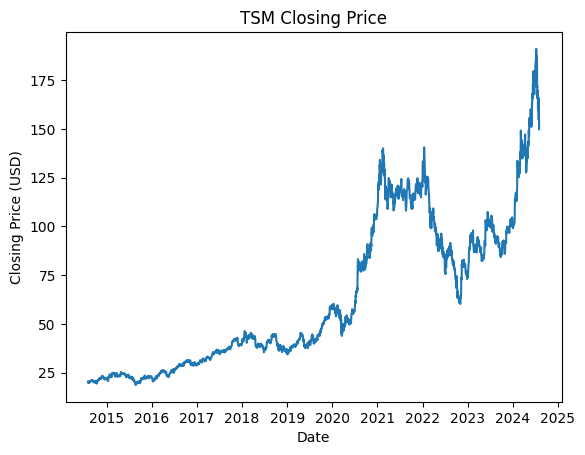

In [25]:
# Plot the Closing price of the stock - the straightforward way

plt.plot(df.index, df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.title('TSM Closing Price')
plt.show()

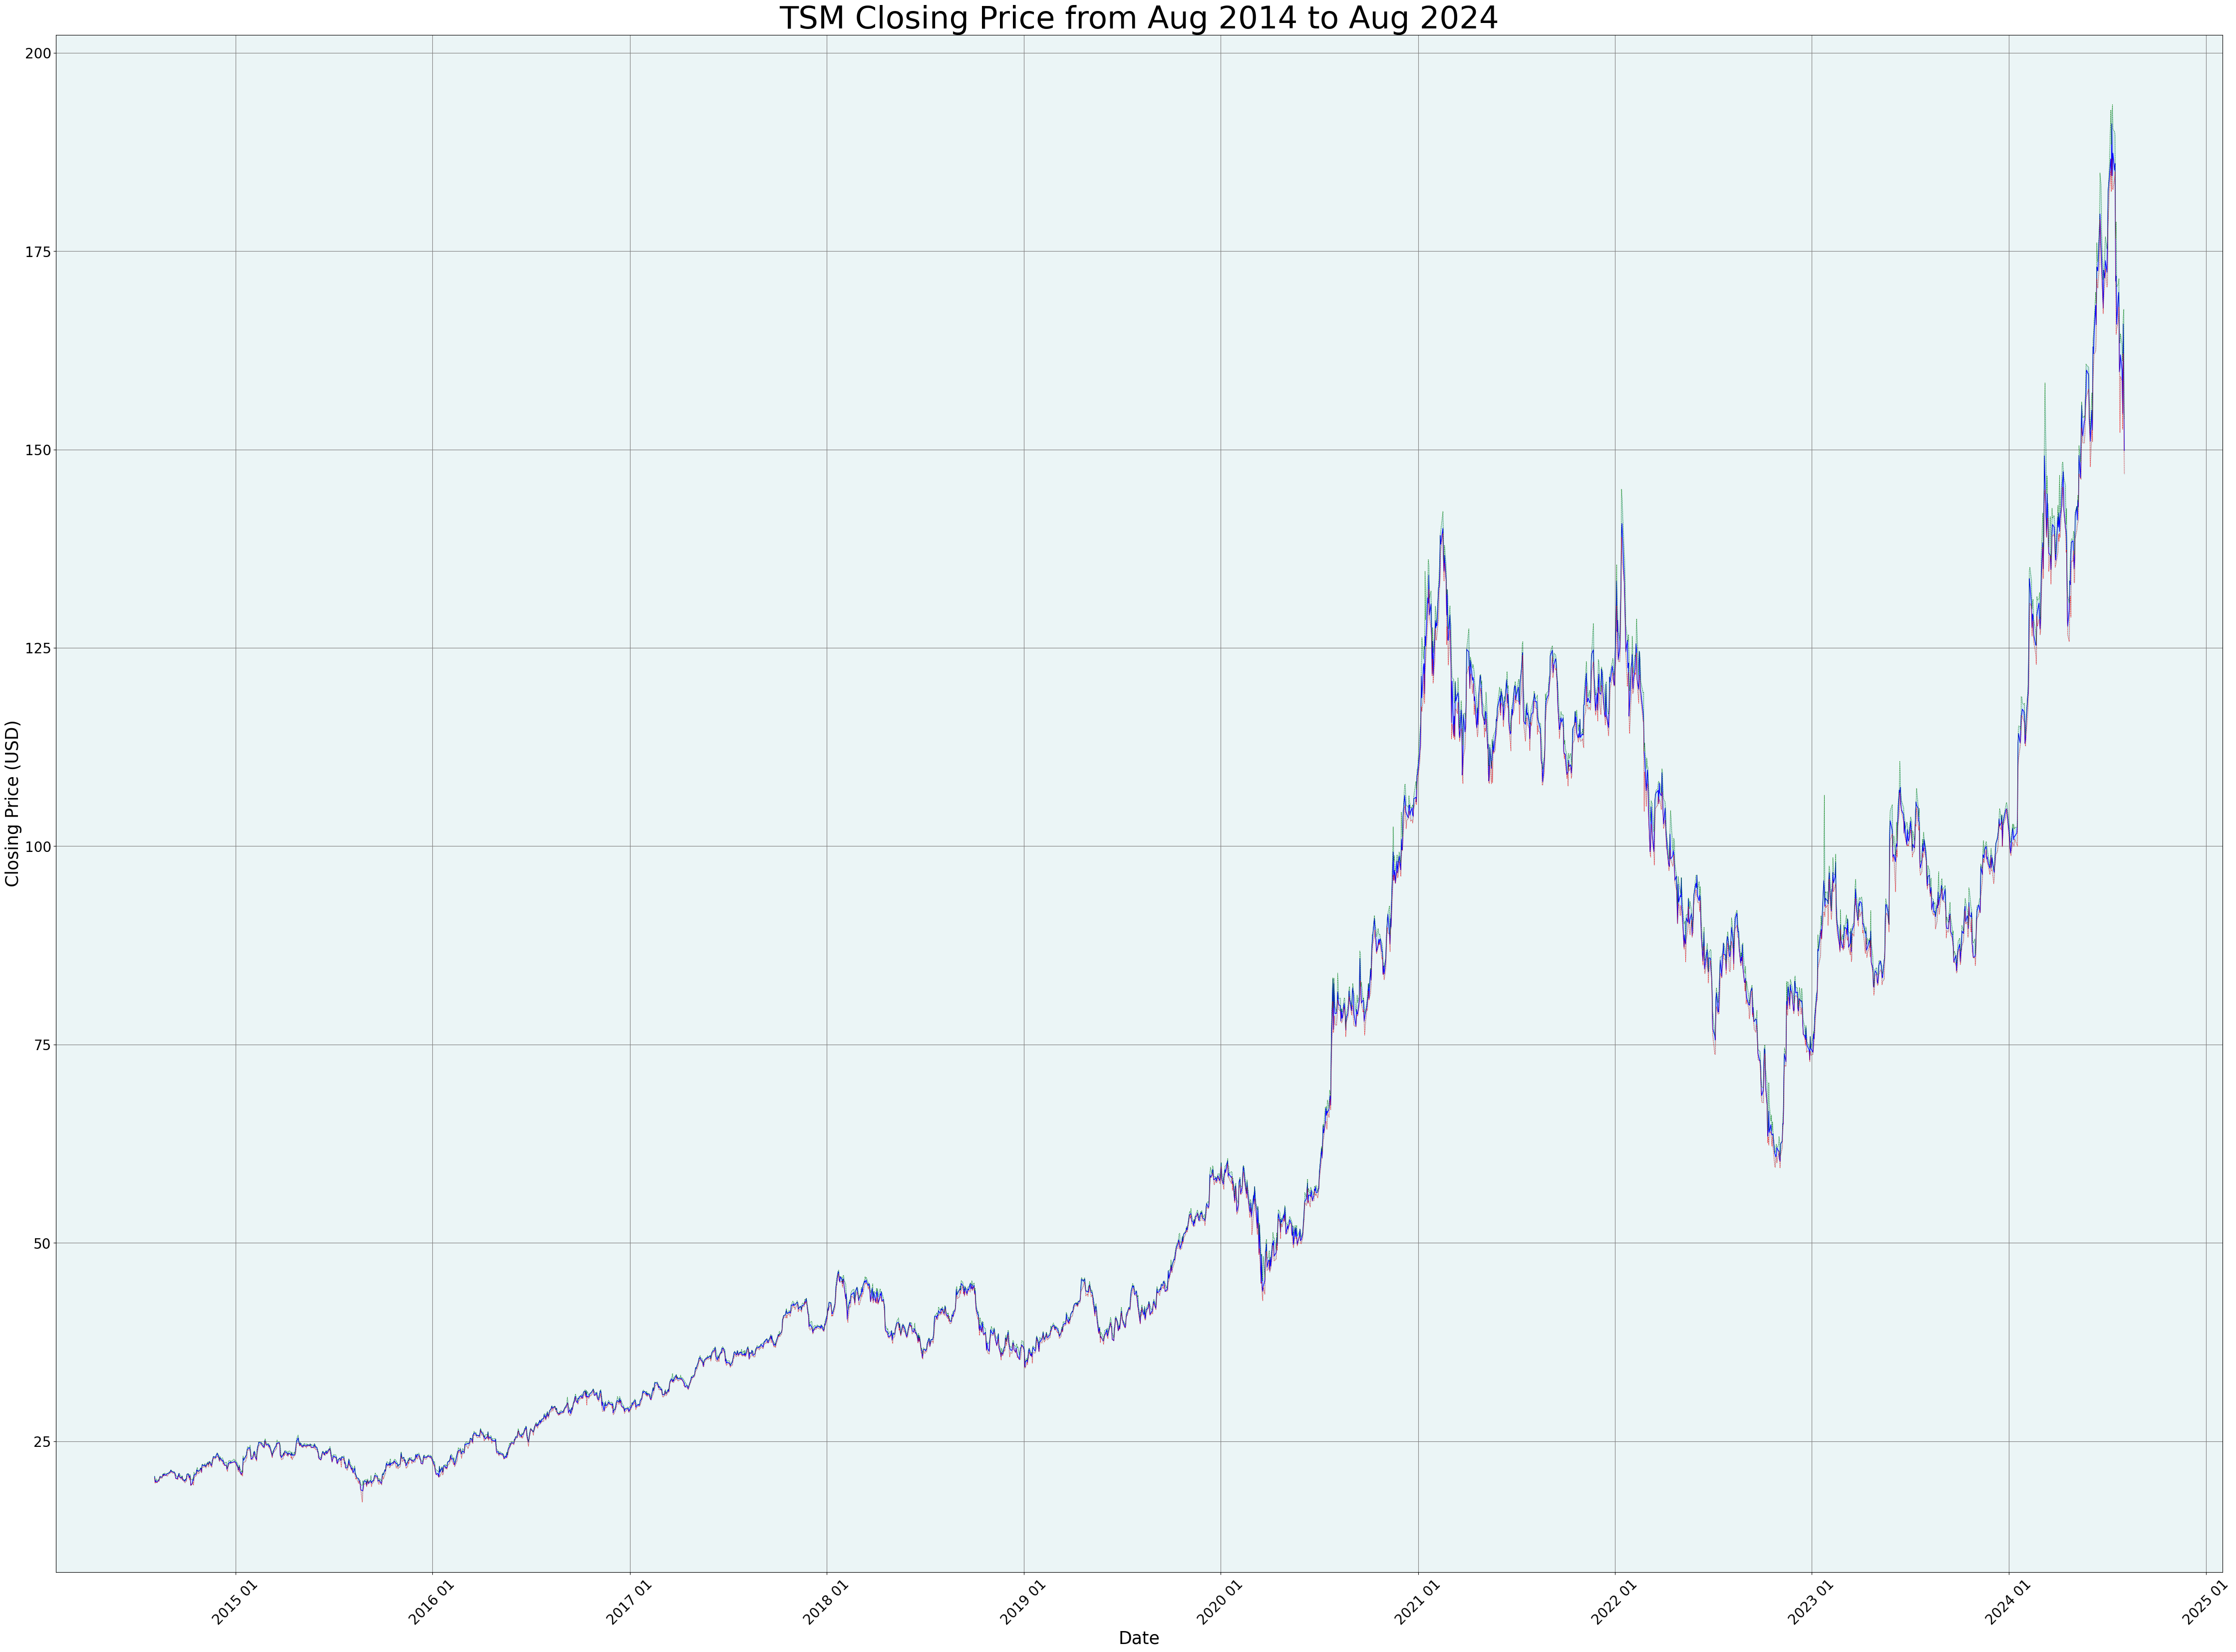

In [27]:
# Plot the Closing price of the stock - the customized way!

# Create  a plot object having a specified size:
#   56 inches in width
#   40 inches in height
plot_figure, ax = plt.subplots(figsize=(56, 40))
ax.set_facecolor('#EBF5F6')


# define the axis:
x = df.index
y_main = df['Close']

# additional y-axis plots to show in between the closing price (considered as y_main)
y_upper = df['High']
y_lower = df['Low']

# Refer to https://matplotlib.org/stable/plot_types/index.html when choosing what type of plot is most appropriate for your data
# plt.plot = for line chart
plt.plot(x, y_main, color = 'blue', linestyle='-' , linewidth=1 )

# Plot the fill in between high and low prices
ax.fill_between(x, y_upper, y_lower, color='lightblue', alpha=0.5)
ax.plot(x, y_upper, color = 'green', linestyle='--' , linewidth=0.5 )
ax.plot(x, y_lower, color = 'red', linestyle='--' , linewidth=0.5 )
plt.grid(color='gray')

# Define the labels and its characteristics
plt.xlabel('Date', fontsize=25)
plt.ylabel('Closing Price (USD)', fontsize=25)

# Formatting time axis tick labels
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y %m'))
plt.tick_params(axis='x', labelsize=20, rotation=45)
plt.tick_params(axis='y', labelsize=20)

# Define the title of the chart
plt.title('TSM Closing Price from Aug 2014 to Aug 2024', fontsize=45)

# Display the plot
plt.show()



---



# [optional]
For visualization purposes, we can create df_2024 to show only prices in this year.

The plots of highs and lows per day will be more obvious with limited data.


In [28]:
# Change the scope of x-axis (include only 2024)

# Use df.loc to access data by label
df_2024 = df.loc['2024-01-01'::]
df_2024

,Close,Volume,Open,High,Low
Date,,,,,
2024-01-02,101.53,9020864,102.25,102.6200,100.590
2024-01-03,100.17,6650601,100.34,101.2500,99.661
2024-01-04,99.13,7996713,99.53,100.4400,99.120
2024-01-05,99.61,7347316,99.00,100.6400,98.800
2024-01-08,102.24,12455560,100.63,102.7900,100.500
...,...,...,...,...,...
2024-07-29,160.01,12663080,162.68,163.2300,158.630
2024-07-30,154.54,22017960,160.44,161.1499,152.550
2024-07-31,165.80,19860380,163.77,166.6500,162.070


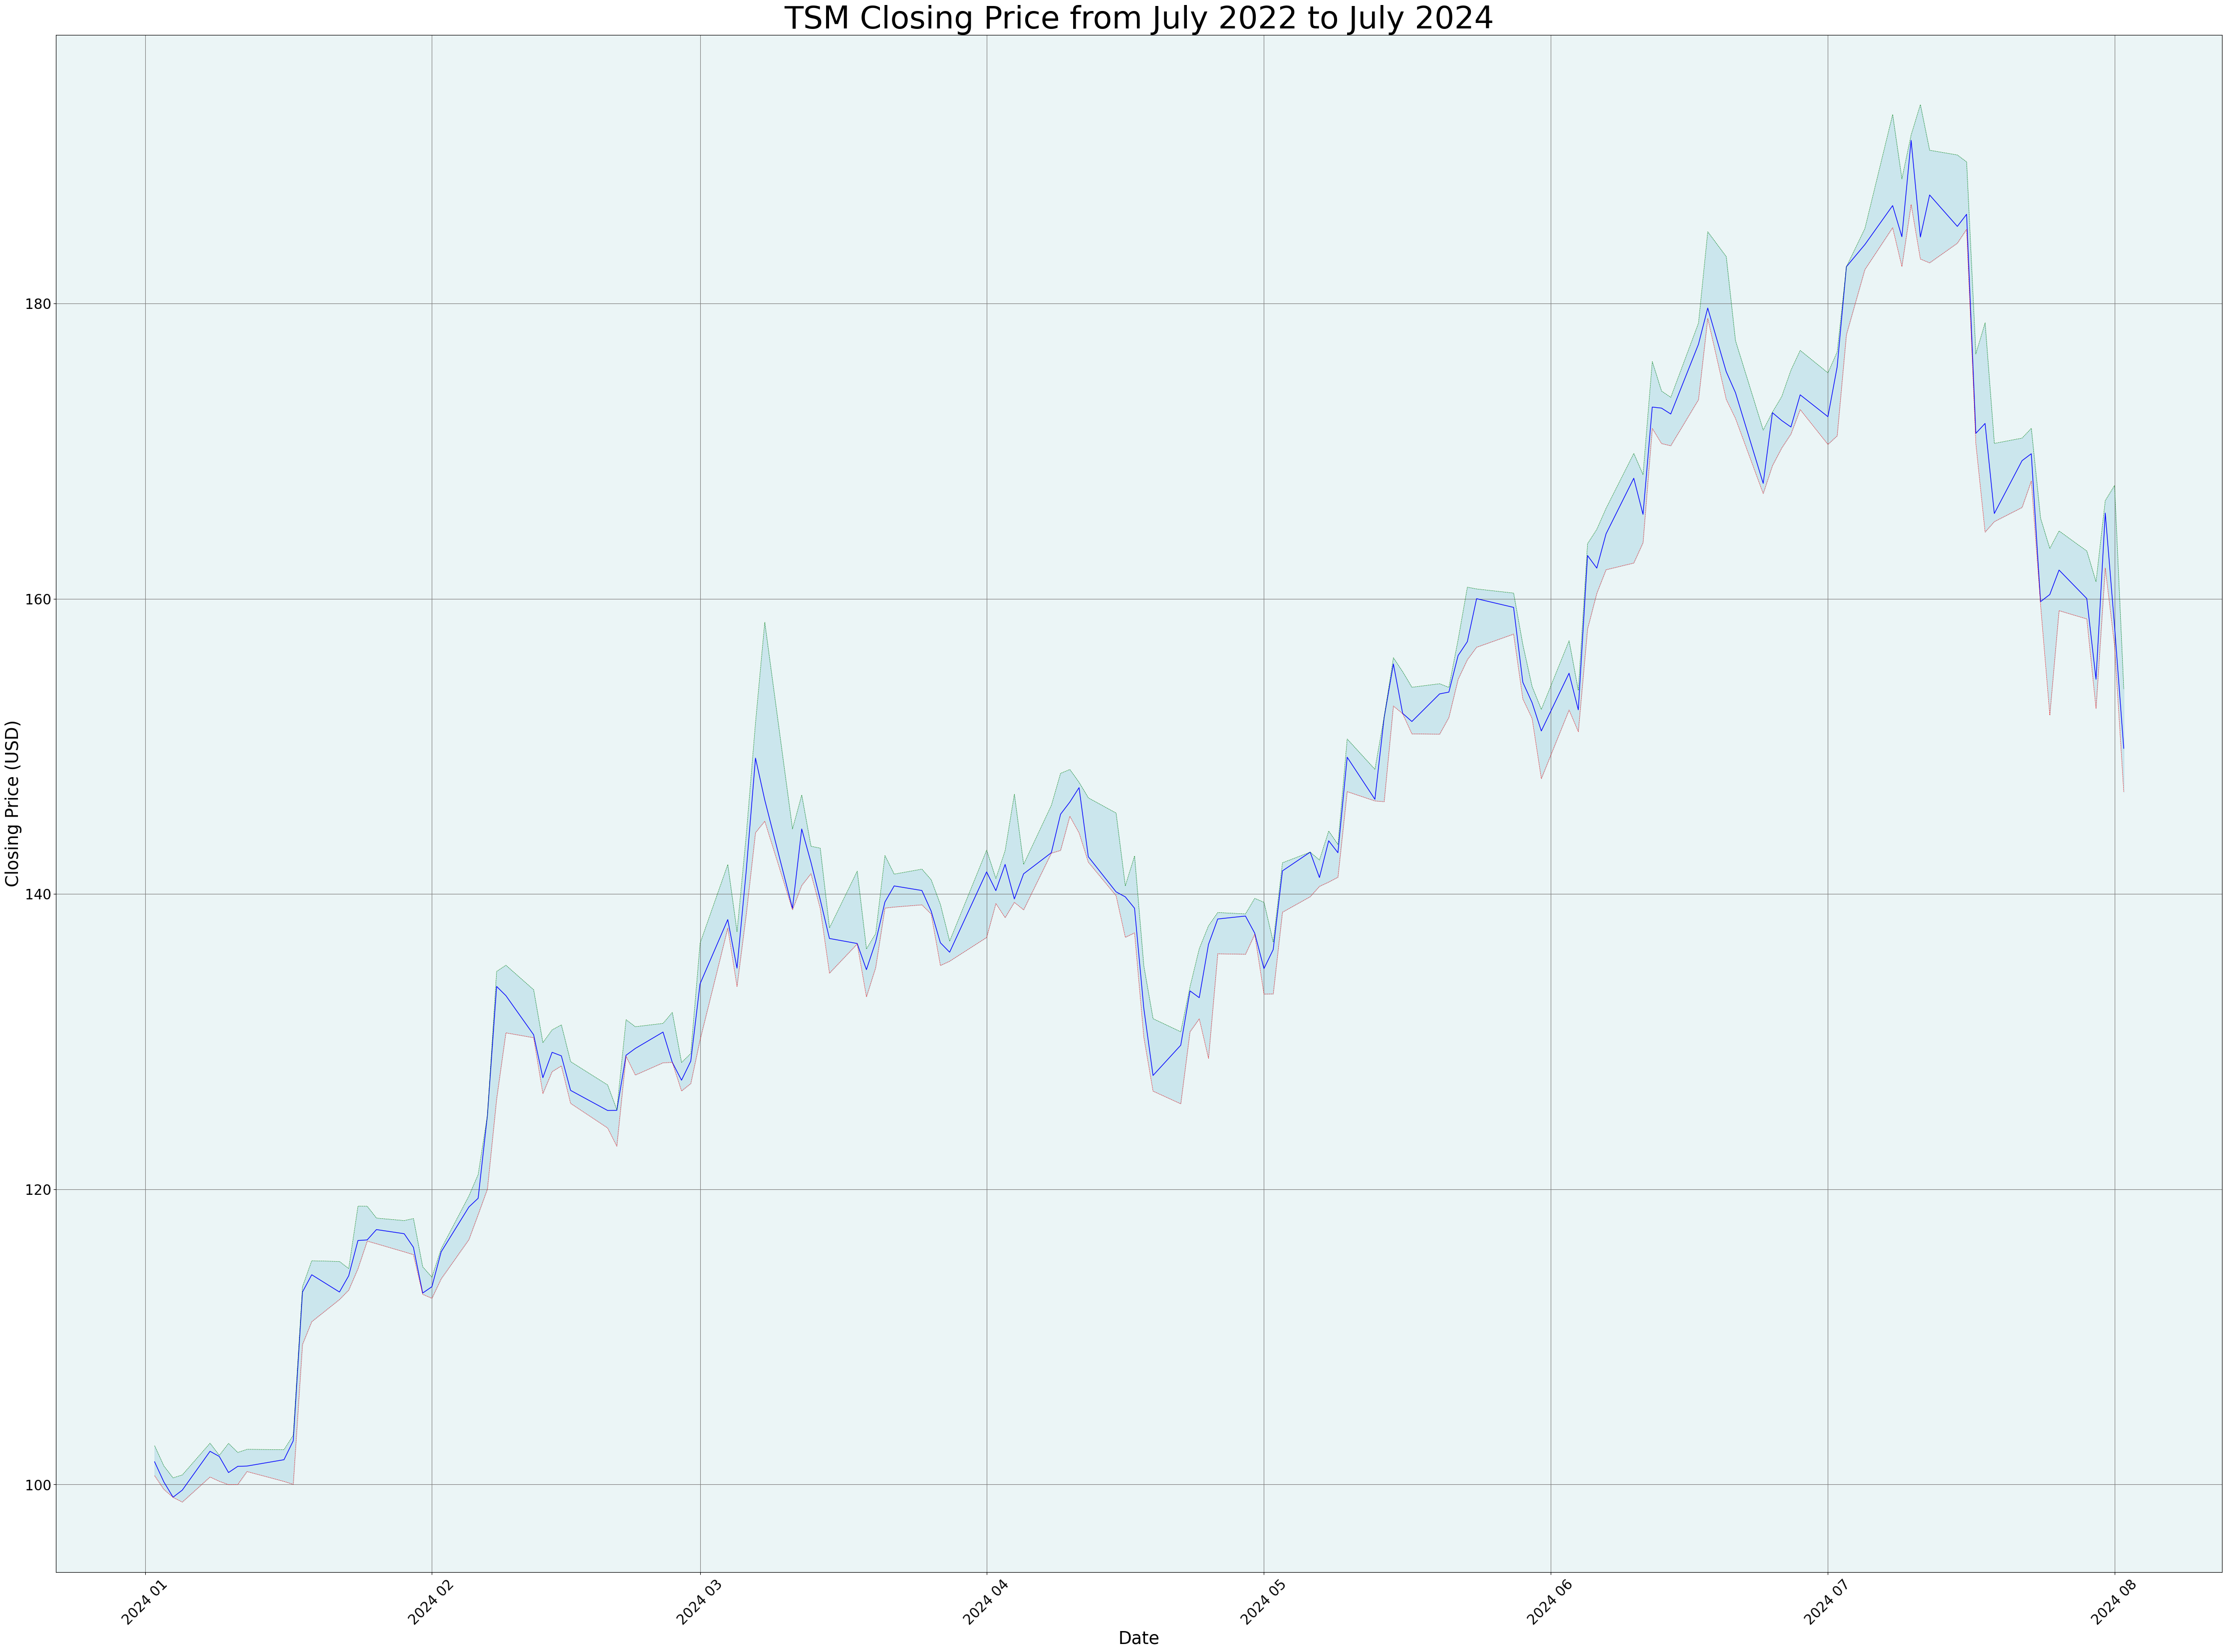

In [29]:
# Update the plot according to the new scope of x-axis

# Create  a plot object having a specified size:
#   56 inches in width
#   40 inches in height
plot_figure, ax = plt.subplots(figsize=(56, 40))
ax.set_facecolor('#EBF5F6')

# define the axis:
x2 = df_2024.index
y2_main = df_2024['Close']

# additional y-axis plots to show in between the closing price (considered as y_main)
y2_upper = df_2024['High']
y2_lower = df_2024['Low']

# Refer to https://matplotlib.org/stable/plot_types/index.html when choosing what type of plot is most appropriate for your data
# plt.plot = for line chart
plt.plot(x2, y2_main, color = 'blue', linestyle='-' , linewidth=1 )

# Plot the fill in between high and low prices
ax.fill_between(x2, y2_upper, y2_lower, color='lightblue', alpha=0.5)
ax.plot(x2, y2_upper, color = 'green', linestyle='--' , linewidth=0.5 )
ax.plot(x2, y2_lower, color = 'red', linestyle='--' , linewidth=0.5 )
plt.grid(color='gray')

# Define the labels and its characteristics
plt.xlabel('Date', fontsize=25)
plt.ylabel('Closing Price (USD)', fontsize=25)

# Formatting time axis tick labels
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y %m'))
plt.tick_params(axis='x', labelsize=20, rotation=45)
plt.tick_params(axis='y', labelsize=20)

# Define the title of the chart
plt.title('TSM Closing Price from July 2022 to July 2024', fontsize=45)

# Display the plot
plt.show()

The high and low shaded ranges look more visible.



---



# 3. Splitting the data

Since the data is ready, the next step is checking how to split the data into a training set and a test set.

Decide how your data will be split. In this case study, I used 80-20:

In [31]:
# Display the number of rows of the DataFrame df
df.shape[0]

2517

In [32]:
# This is simply to display the number of rows to be used in the training set

df.shape[0] * 0.8

2013.6000000000001

In [33]:
# Calculate and display the train and test sizes:

train_size = int(df.shape[0] * 0.8)
print(f'The train size is: {train_size}')

test_size = int(df.shape[0] * 0.2)
print(f'The test size is: {test_size}')

The train size is: 2013
The test size is: 503


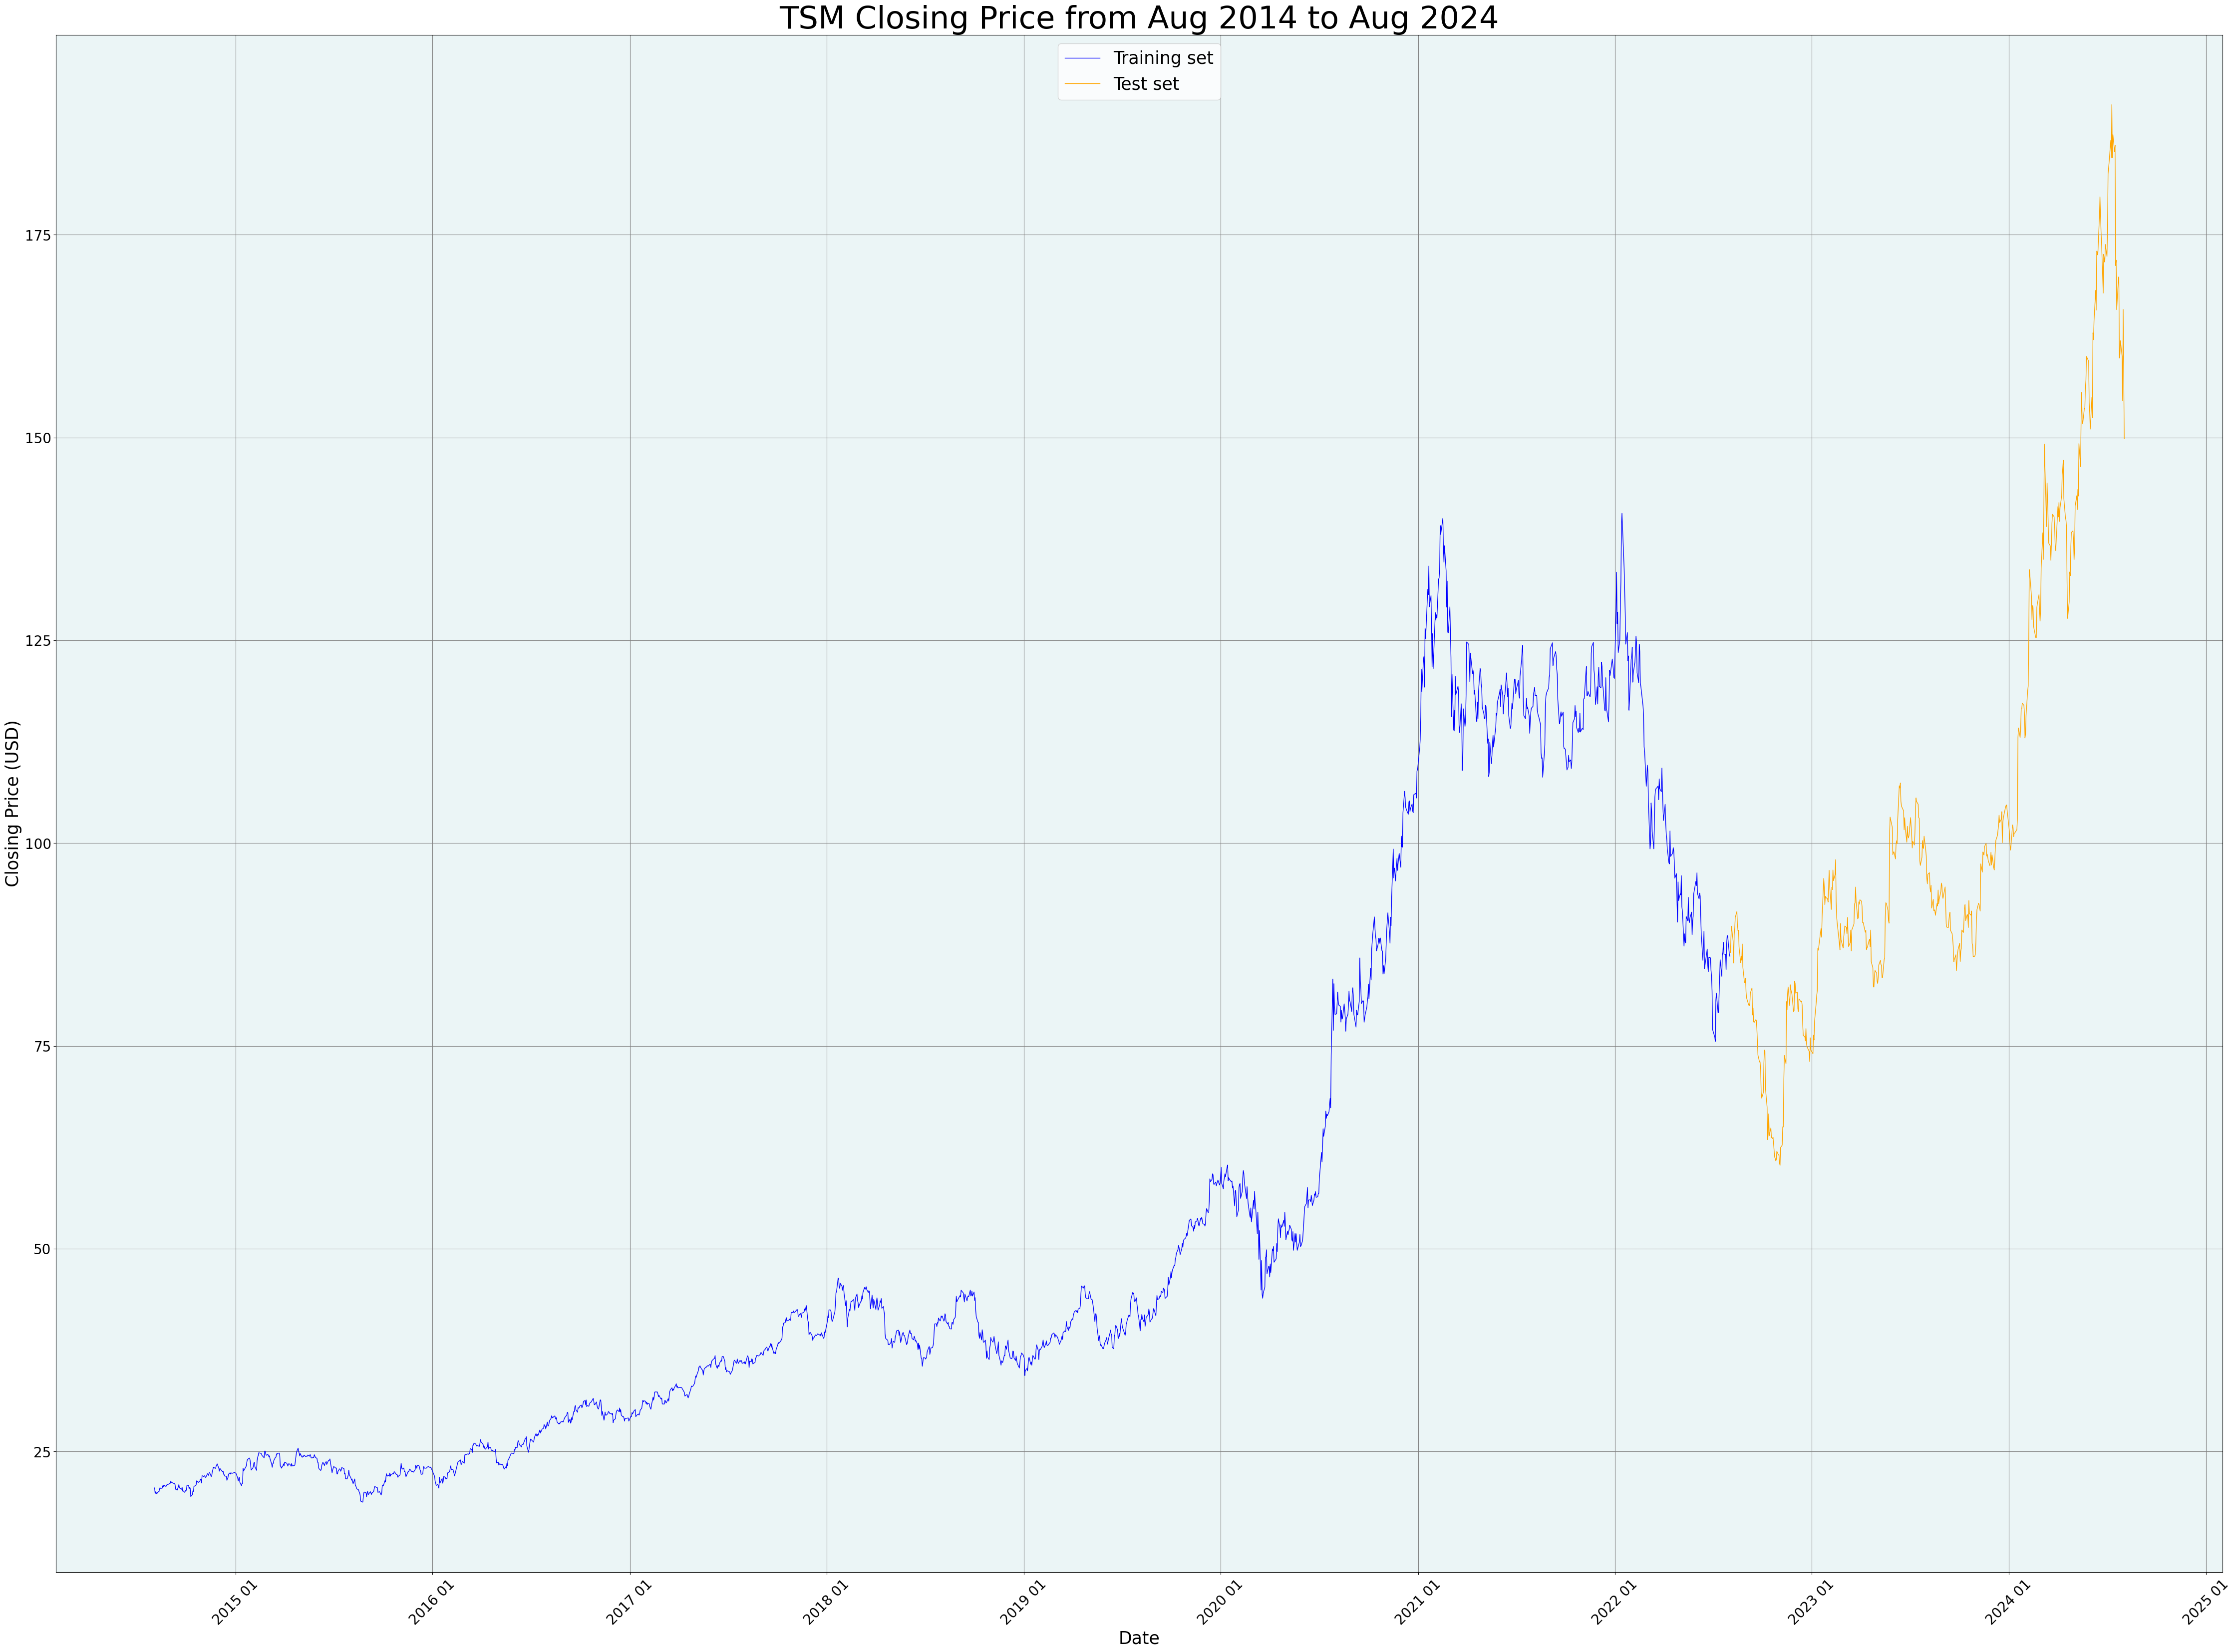

In [34]:
# Create  a plot object having a specified size:
#   56 inches in width
#   40 inches in height
plot_figure, ax = plt.subplots(figsize=(56, 40))
ax.set_facecolor('#EBF5F6')

# Line Plot both train and test sets
plt.plot(df.index[:-test_size], df['Close'][:-test_size], color='blue', linewidth=1)
plt.plot(df.index[-test_size:], df['Close'][-test_size:], color='orange', linewidth=1)


# Define the labels and its characteristics
plt.xlabel('Date', fontsize=25)
plt.ylabel('Closing Price (USD)', fontsize=25)

# Formatting time axis tick labels
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y %m'))
plt.tick_params(axis='x', labelsize=20, rotation=45)
plt.tick_params(axis='y', labelsize=20)
plt.grid(color='gray')

# Define the title of the chart
plt.title('TSM Closing Price from Aug 2014 to Aug 2024', fontsize=45)

# Add a legend to differentiate the data
plt.legend(['Training set', 'Test set'], loc='upper center', prop={'size': 25})

# Display the data
plt.show()



---



# 4. Train the model

Documentations used in this part :

*   https://scikit-learn.org/stable/index.html
*   https://www.tensorflow.org/
*   https://keras.io/guides/
*   https://pypi.org/project/swish/




In [35]:
#import the necessary modules

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

import tensorflow as tf
from tensorflow.keras.layers import Layer

from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM


Additional module to use: SWISH

Swish is an acivation function that is defined as f(x) = x * sigmoid(x), where :

x is the input value to the activation function
sigmoid(x) is equal to (1+exp(-x))^-1. The sigmoid function maps any real-value number to [0, 1] which smoothens the transitions from 0 to 1 as the value x increases.
References:

https://arxiv.org/pdf/1710.05941v1 - SWISH: A SELF-GATED ACTIVATION FUNCTION https://www.geeksforgeeks.org/swish-activation-function-in-pytorch/

In [36]:
pip install swish

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 3.6 MB/s eta 0:00:00


In [37]:
pip install swish-activation

In [39]:
import swish

In [40]:
# Transform features by scaling each feature to a given range
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

scaler = MinMaxScaler()

# Compute the minimum and maximum to be used for later scaling.
scaler.fit(df['Close'].values.reshape(-1,1))

MinMaxScaler()

In [41]:
# MinMaxScaler attributes :
# data_min_ndarray of shape (n_features,) Per feature minimum seen in the data
# data_max_ndarray of shape (n_features,) Per feature maximum seen in the data
# data_range_ndarray of shape (n_features,) Per feature range (data_max_ - data_min_) seen in the data

print(scaler.data_min_)
print(scaler.data_max_)
print(scaler.data_range_)

[18.76]
[191.05]
[172.29]


Train and test using window_size = 60

In [42]:
# Window size defines the period of observation that the algorithm will consider in a time series.
# The longer the window, the smaller number of samples
# First attempt (60 days)
# Try later (30 days)...

window_size = 60

In [43]:
train_data = df['Close'][:-test_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

In [44]:
X_train = []
y_train = []

for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [45]:
test_data = df['Close'][-test_size-60:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [46]:
X_test = []
y_test = []

for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])

In [47]:
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

In [48]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', X_test.shape)
print('y_test Shape:  ', y_test.shape)

X_train Shape:  (1954, 60, 1)
y_train Shape:  (1954, 1)
X_test Shape:   (503, 60, 1)
y_test Shape:   (503, 1)


In [49]:
class Swish(Layer):
    def call(self, inputs):
        return inputs * tf.nn.sigmoid(inputs)

def define_LSTM_model():
    input_1 = Input(shape=(window_size, 1))
    x = LSTM(units=64, return_sequences=True)(input_1)
    x = Dropout(0.2)(x)
    x = LSTM(units=64, return_sequences=True)(x)
    x = Dropout(0.2)(x)
    x = LSTM(units=64)(x)
    x = Dropout(0.2)(x)

    x = Dense(128, activation=Swish())(x)

    dnn_output = Dense(1, activation=Swish())(x)

    model = Model(inputs=input_1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer='Adam')
    model.summary()

    return model

In [50]:
model = define_LSTM_model()
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 60, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,393 (357.00 KB)

 Trainable params: 91,393 (357.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 13s 143ms/step - loss: 0.0102 - val_loss: 0.0044
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 6.1327e-04 - val_loss: 0.0027
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - loss: 4.3708e-04 - val_loss: 0.0040
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - loss: 2.8662e-04 - val_loss: 0.0027
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 166ms/step - loss: 3.4458e-04 - val_loss: 0.0033
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 3.7838e-04 - val_loss: 0.0025
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - loss: 3.7927e-04 - val_loss: 0.0011
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - loss: 2.3277e-04 - val_loss: 0.0016
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step - loss: 2.2549e-04 - val_loss: 0.0093
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - loss: 3.0226e-04 - val_loss: 0.0015
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - loss: 2.4329e-04 - val_loss: 0.0015
Epoch 12/

In [51]:
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 4.3329e-04
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step


In [52]:
# Calculate the regression metrics

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE

In [53]:
# Display the results and calculated metrics

print("Test Loss:", result)

print("Mean Absolute Error (mae):", mae)
print("Mean Absolute Error (mae):", mse)
print("R2 score:", r2) # Best possible score is 1.0

print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 0.0007593255722895265
Mean Absolute Error (mae): 0.019385405712605344
Mean Absolute Error (mae): 0.0007593255559019849
R2 score: 0.9740136985008858
Test MAPE: 0.037787059241348765
Test Accuracy: 0.9622129407586513


In [54]:
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

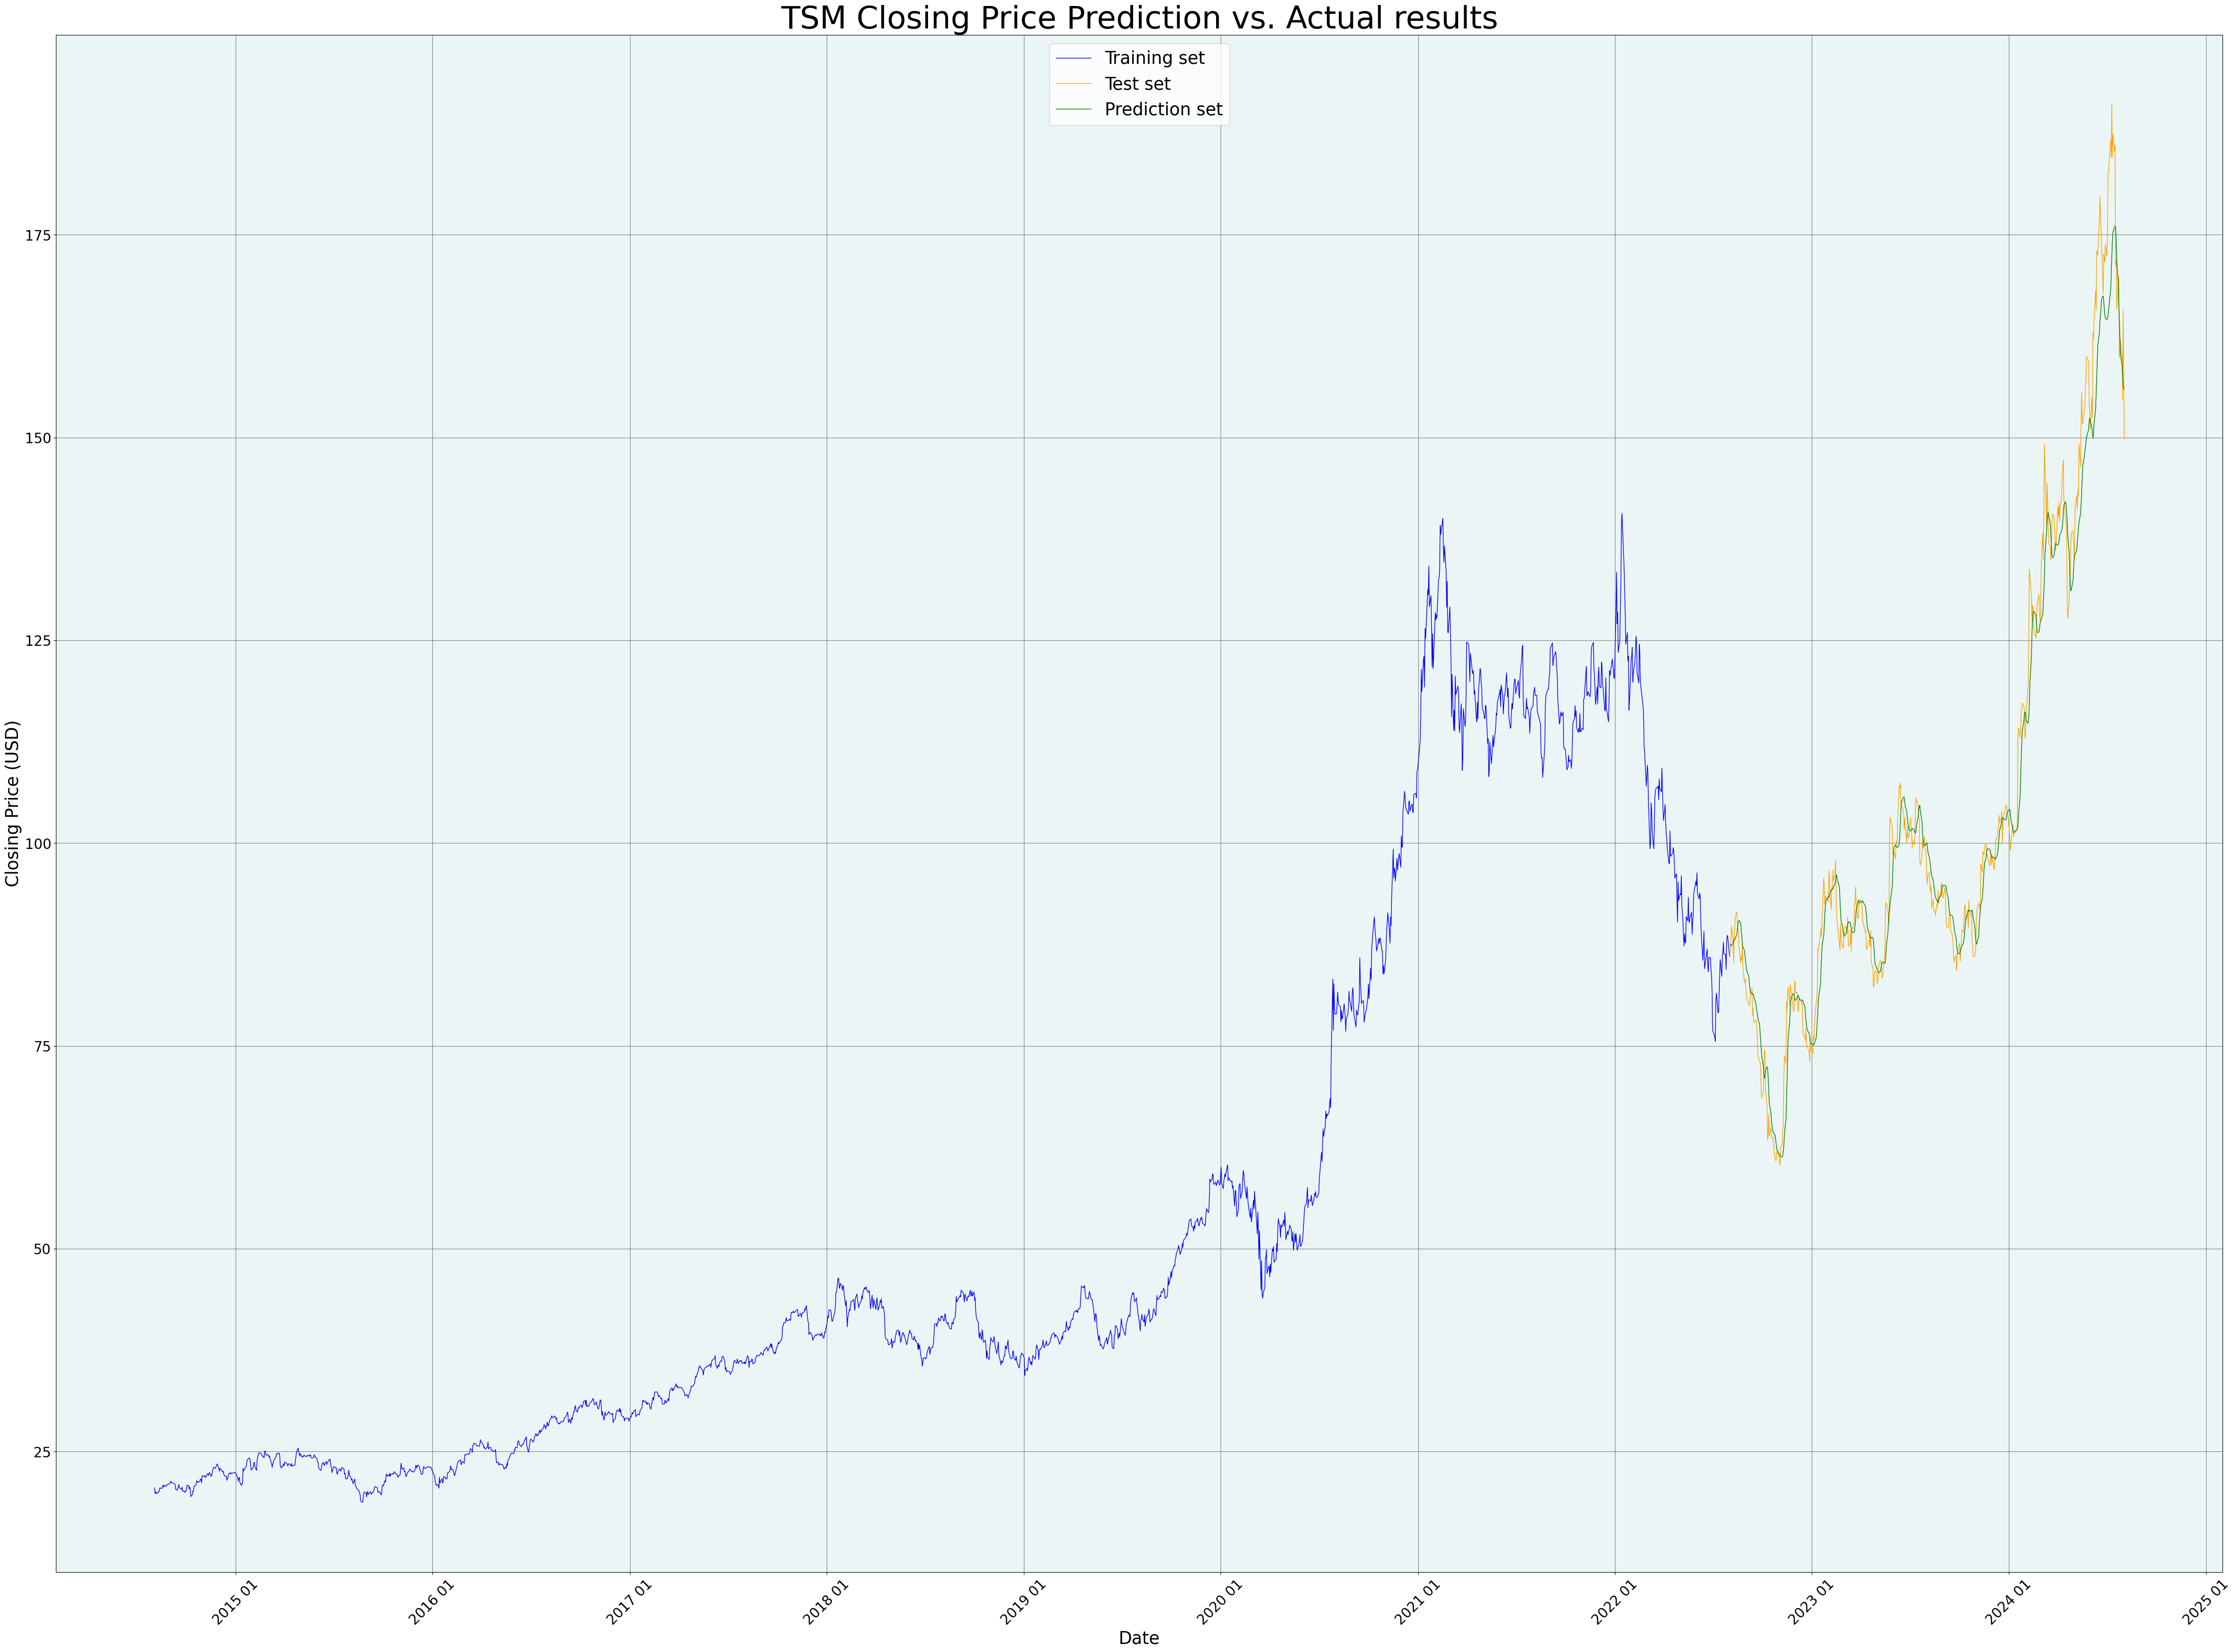

In [55]:
# Create the resulting plot object having a specified size:
#   56 inches in width
#   40 inches in height
plot_figure, ax = plt.subplots(figsize=(56, 40))
ax.set_facecolor('#EBF5F6')

# Line Plot both train and test sets
plt.plot(df.index[:-test_size], scaler.inverse_transform(train_data), color='blue', linewidth=1)
plt.plot(df.index[-test_size:], y_test_true, color='orange', linewidth=1)

plt.plot(df.index[-test_size:], y_test_pred, color='green', linewidth=1)


# Define the labels and its characteristics
plt.xlabel('Date', fontsize=25)
plt.ylabel('Closing Price (USD)', fontsize=25)

# Formatting the time axis tick labels
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y %m'))
plt.tick_params(axis='x', labelsize=20, rotation=45)
plt.tick_params(axis='y', labelsize=20)
plt.grid(color='gray')

# Define the title of the chart
plt.title('TSM Closing Price Prediction vs. Actual results', fontsize=45)

# Add a legend to differentiate the data
plt.legend(['Training set', 'Test set', 'Prediction set'], loc='upper center', prop={'size': 25})

# Display the data
plt.show()

My observations:

The prediction and actual values are very close in the 2023 timeframe.

In 2024, there are predictions that are lower than the actual closing prices. Events can affect such cases, for instance, based on their quarterly report for 2024 Q2: "*second quarter revenue was $20.82 billion, which increased 32.8% year-over-year and increased 10.3% from the previous quarter.*" (This is only my observation from quick investor page checking. Of course, we can also consider that predictions may not fully have a proportional relation to the actual data within the whole prediction set).  

More info on TSM in their site:
https://investor.tsmc.com/english/quarterly-results/2024/q2
https://investor.tsmc.com/english/